# **STUDENTS SOCIAL MEDIA ADDICTION**

In [2]:
# importing file
from google.colab import files
uploaded = files.upload()

Saving Students Social Media Addiction (1).csv to Students Social Media Addiction (1).csv


In [ ]:
import pandas as pd

print("STUDENTS SOCIAL MEDIA ADDICTION\n")

df = pd.read_csv('Students Social Media Addiction (1).csv')
print(df.shape)   # prints no. of rows and columns
df.head(10)    # print top 10 rows

STUDENTS SOCIAL MEDIA ADDICTION

(705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [ ]:
# To get the information about data i.e datatypes , not null values etc
#df.info()
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
# check for null values
pd.isnull(df)

print(pd.isnull(df).sum())

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [ ]:
# to drop null values but here is no null value present here

df.dropna(inplace=True)  # inplace is used for saving the changes of a statement in file data

In [ ]:
# change datatype
df['Addicted_Score'] = df['Addicted_Score'].astype('float')
print(df['Addicted_Score'].dtypes)

df['Addicted_Score'] = df['Addicted_Score'].astype('int')
print(df['Addicted_Score'].dtypes)  # as there is no need to change the dtype

float64
int64


In [ ]:
# adding new column(Risk)
import numpy as np

condition = [
    (df['Addicted_Score']>=7),
     (df['Addicted_Score']>=4),
      (df['Addicted_Score']<4)
      ]

choice = ['High','Medium','Low']
df['Risk'] = np.select(condition,choice,default = 'N/A')
print(df['Risk'],'\n')


# Detox Strategy using if-else

for index, row in df.iterrows():
  d_use = row['Avg_Daily_Usage_Hours']

  if d_use >= 4:
    strategy = 'DETOX STRATEGY: Set a clear goal (e.g., “I’ll stay off IG for 7 days”) ;\
             Delete or hide apps temporarily;\
             Fill the time with alternatives (reading, exercising, hobbies).'
  elif d_use >=2:
    strategy = 'DETOX STRATEGY: No social media after 8 PM ; \
             Unfollow/mute toxic accounts'
  else:
    Strategy = 'DETOX STRATEGY: Participate actively instead of passively(just scrolling) '

  #print(f"{index + 1}: {strategy}")
# output is too long that's why print is commented


# Detox strategies using if-else in numpy

detox = [
    (df['Avg_Daily_Usage_Hours']>=4) | (df['Addicted_Score']>=7),
    (df['Avg_Daily_Usage_Hours']>=2) | (df['Addicted_Score']>=4),
    (df['Avg_Daily_Usage_Hours']<2) | (df['Addicted_Score']<4)
    ]

strategy = ['DETOX STRATEGY: Set a clear goal (e.g., “I’ll stay off IG for 7 days”) ;\
             Delete or hide apps temporarily;\
             Fill the time with alternatives (reading, exercising, hobbies).',
            'DETOX STRATEGY: No social media after 8 PM ; \
             Unfollow/mute toxic accounts',
            'DETOX STRATEGY: Participate actively instead of passively(just scrolling) '
            ]

df['Detox_strategies'] = np.select(detox,strategy,default='N/A')
print(df['Detox_strategies'])

0        High
1         Low
2        High
3      Medium
4        High
        ...  
700    Medium
701      High
702      High
703    Medium
704      High
Name: Risk, Length: 705, dtype: object 

0      DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
1      DETOX STRATEGY: No social media after 8 PM ;  ...
2      DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
3      DETOX STRATEGY: No social media after 8 PM ;  ...
4      DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
                             ...                        
700    DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
701    DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
702    DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
703    DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
704    DETOX STRATEGY: Set a clear goal (e.g., “I’ll ...
Name: Detox_strategies, Length: 705, dtype: object


In [ ]:
# to save new column in excel
df.to_excel('updated_social_addiction.xlsx',index=False)

## **Relationships between data**

Exploratory Data Analysis (EDA)

In [ ]:
# all columns
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score', 'Risk',
       'Detox_strategies'],
      dtype='object')

In [ ]:
df_grouped = df.groupby('Age')[['Addicted_Score','Mental_Health_Score','Sleep_Hours_Per_Night']].mean().reset_index()
print(df_grouped)

   Age  Addicted_Score  Mental_Health_Score  Sleep_Hours_Per_Night
0   18        7.785714             5.214286               5.535714
1   19        6.650307             6.055215               6.742945
2   20        6.478788             6.218182               6.864848
3   21        6.589744             6.160256               6.868590
4   22        6.095238             6.476190               7.127891
5   23        5.676471             6.647059               6.938235
6   24        6.115385             6.346154               6.850000


AVERAGE DAILY USAGE BY AGE AND GENDER

Gender    Female      Male
Age                       
18      5.980000  5.055556
19      5.128889  5.078571
20      4.904110  5.131579
21      5.035484  4.929600
22      5.069231  4.638060
23      4.326667  4.652632
24      5.462500  4.861111




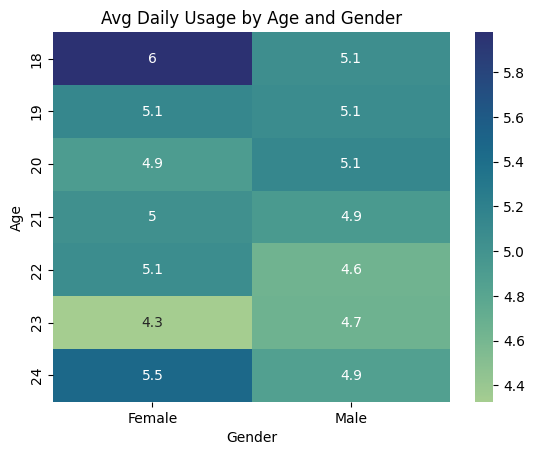

In [ ]:
# Relationships between: Age, Gender, Daily Usage (in hours)

import matplotlib.pyplot as plt
import seaborn as sns

print('AVERAGE DAILY USAGE BY AGE AND GENDER\n')
pivot = df.pivot_table(
    index = 'Age',
    columns = 'Gender',
    values = 'Avg_Daily_Usage_Hours',
    aggfunc = 'mean'
)
print(pivot)
print('\n')

# heatmap
sns.heatmap(pivot, annot=True, cmap='crest')
plt.title('Avg Daily Usage by Age and Gender')
plt.show()


*From above graph, we can see that while average daily usage remains generally balanced across genders, a small trend emerges: females consistently show slightly higher usage in several age groups (e.g., 18, 19, 21, 22, 24).But, this pattern reverses at ages 20 and 23, where males report marginally higher usage.*

Relationships between: Sleep patterns, Academic performance, Social interaction

Affects_Academic_Performance        No       Yes
Most_Used_Platform                              
Facebook                      7.811628  6.310811
Instagram                     8.122078  6.528488
KakaoTalk                          NaN  7.050000
LINE                          8.350000       NaN
LinkedIn                      7.285714       NaN
Snapchat                      6.500000  5.641667
TikTok                        7.520000  6.282639
Twitter                       7.405263  6.590909
VKontakte                     7.750000       NaN
WeChat                        8.100000  6.712500
WhatsApp                           NaN  5.870370
YouTube                       6.628571  5.700000


<class 'module'>


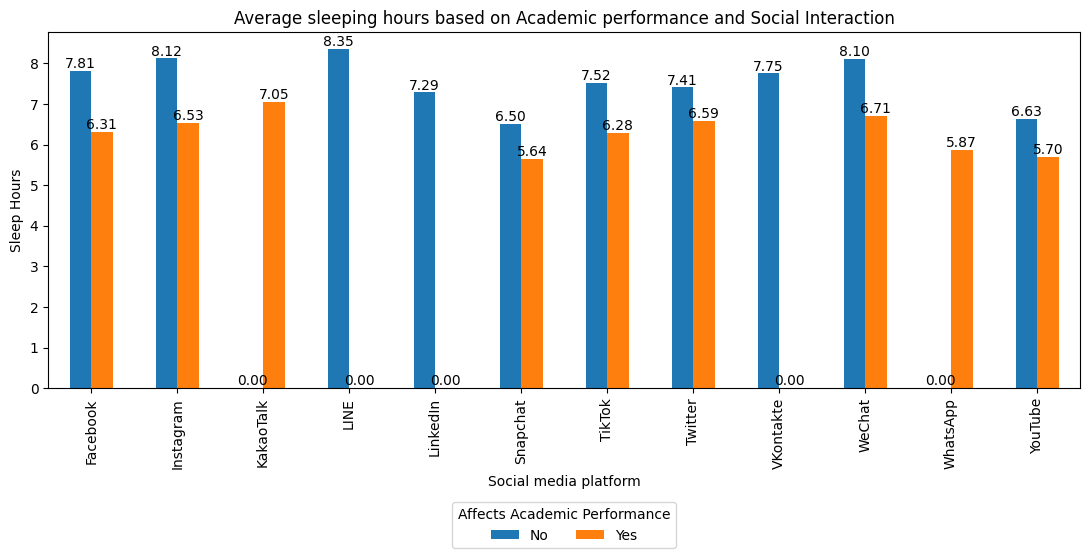

In [ ]:
# Relationships between: Sleep patterns, Academic performance, Social interaction

print('Relationships between: Sleep patterns, Academic performance, Social interaction\n')

grouped = df.groupby(['Most_Used_Platform',
                      'Affects_Academic_Performance']
                     )['Sleep_Hours_Per_Night'].mean().unstack()
print(grouped)
print('\n')

# BAR GRAPH
ax = grouped.plot(kind='bar', figsize=(11,6), title='Average sleeping hours based on\
 Academic performance and Social Interaction')
print(type(plt))
plt.ylabel('Sleep Hours')
plt.xlabel('Social media platform')
plt.legend(title = 'Affects Academic Performance',
           loc = 'upper center',
           bbox_to_anchor = (0.5, -0.30),
           ncol = 2
           )

for bars in ax.containers:
  ax.bar_label(bars,fmt = '%.2f')

plt.tight_layout()
plt.show()

*From above graph, we can see that some platforms(LINE, LinkedIn, Vkontakte) don't affect Academic performance having nearly good average sleeping cycle.
Majorly these platforms are not influencing grades except two i.e Kakao Talk and Whatsapp which may be helping in sharing of knowledge.
Students need to reduce their screen time as their sleeping habit is being drastically impacted by some apps (Snapchat, Whatspp and youtube), which will lead to poor health in long run.*

In [ ]:
country_counts = df['Country'].value_counts().sort_values(ascending = False).head(10)

print(country_counts)

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
Spain          27
Turkey         27
Ireland        27
Denmark        27
Switzerland    27
Name: count, dtype: int64


In [ ]:
df.groupby('Country')['Addicted_Score'].sum().sort_values(ascending = False).head(10)

,Addicted_Score
Country,
India,398
USA,344
Canada,228
Mexico,199
Turkey,198
Spain,197
Ireland,174
UK,159
Bangladesh,150


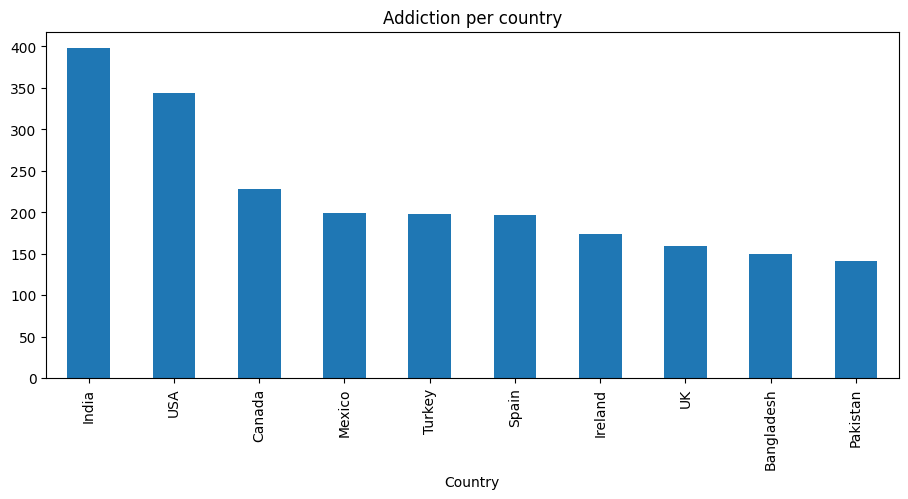

In [ ]:
# Top 10 countries with addiction of social platforms

df.groupby('Country')['Addicted_Score'].sum().sort_values(ascending = False).head(10).plot(kind ='bar', figsize = (11,4.5))
plt.title('Addiction per country')
plt.ylabel= 'Addiction'


*From the above graph, we can conclude that India is the most addicted country followed by US and Canada in social media.*

ADDICTION BY AGE



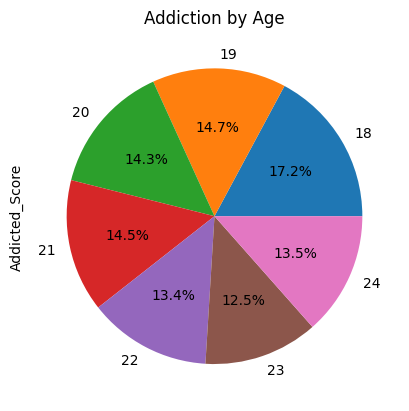

In [ ]:
print('ADDICTION BY AGE\n')
group_age = df.groupby('Age')['Addicted_Score'].mean().plot(kind = 'pie', title = 'Addiction by Age', autopct = '%1.1f%%')
plt.xlabel = 'Age'

*Above chart shows that students of age 18 are most addicted.*

ADDICTION BY EDUCATION LEVEL



Text(0, 0.5, '')

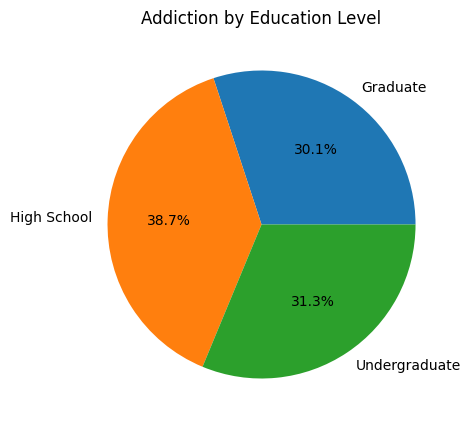

In [ ]:
print('ADDICTION BY EDUCATION LEVEL\n')
group = df.groupby('Academic_Level')['Addicted_Score'].mean()
ax= group.plot.pie(title = 'Addiction by Education Level', autopct = '%1.1f%%',figsize = (10,5))
plt.xlabel = 'Academic_Level'
ax.set_ylabel('')

*Above chart shows that High Schoolers tend to be more addictive of social media*

## **Grouping Addiction score by age, gender, Education level.**

In [ ]:
# Using groupby

print('GROUPING BY AGE\n')
group_age = df.groupby('Age')['Addicted_Score'].mean()
print(group_age)
print('\n')

group_AL = df.groupby('Age')['Academic_Level'].count()
print(group_AL)
print('\n')


print('GROUPING BY GENDER\n')
group_gender = df.groupby('Gender')['Addicted_Score'].mean()
print(group_gender)
print('\n')

print('GROUPING BY EDUCATION LEVEL\n')
group_edu = df.groupby('Academic_Level')['Addicted_Score'].mean()
print(group_edu)

GROUPING BY AGE

Age
18    7.785714
19    6.650307
20    6.478788
21    6.589744
22    6.095238
23    5.676471
24    6.115385
Name: Addicted_Score, dtype: float64


Age
18     14
19    163
20    165
21    156
22    147
23     34
24     26
Name: Academic_Level, dtype: int64


GROUPING BY GENDER

Gender
Female    6.515581
Male      6.357955
Name: Addicted_Score, dtype: float64


GROUPING BY EDUCATION LEVEL

Academic_Level
Graduate         6.243077
High School      8.037037
Undergraduate    6.492918
Name: Addicted_Score, dtype: float64


In [ ]:
# grouping all
group_all = df.groupby(['Age','Gender','Academic_Level'])['Addicted_Score'].mean().unstack()
print(group_all)

Academic_Level  Graduate  High School  Undergraduate
Age Gender                                          
18  Female           NaN     8.800000            NaN
    Male             NaN     7.222222            NaN
19  Female           NaN     8.375000       6.488189
    Male             NaN     8.333333       6.720000
20  Female           NaN     8.000000       6.416667
    Male             NaN          NaN       6.789474
21  Female      6.166667          NaN       6.947368
    Male        6.669811          NaN       6.052632
22  Female      6.461538          NaN            NaN
    Male        6.059701          NaN            NaN
23  Female      5.533333          NaN            NaN
    Male        5.789474          NaN            NaN
24  Female      6.500000          NaN            NaN
    Male        5.944444          NaN            NaN


In [ ]:
print('\n')

# **SUMMARY**

1.   **KEY PATTERNS:**

*  Females show slightly higher usage of social media.
*   Social media platforms are not affecting grades much but students's sleep cycle which will impact their health drastically in long run.

*   High schoolers (Age 18) tend to be addicted more.
































   





In [ ]:
print('\n')

2. **ROOT CAUSE:**
*   Work or Academic demands as students used networking apps had no affect at studies and had good sleep cycle.
*   Out of boredom or loneliness students tend to scroll that leads to binge usage.

*  FOMO(Fear of Missing out) is the anxiety developed in students that force them to know every trend going on.

In [ ]:
print('\n')

3.  **RECOMMENDED ACTIONS TO COMBAT ADDICTION:**

*   Enable usage limits via tools like Digital Wellbeing (Android), Screen Time (iOS), or third-party apps (e.g., StayFocusd).
*  Turn off non-essential alerts to reduce constant temptation.
*  Switch your phone to grayscale to make apps less visually stimulating.
*  Designate device-free hours or social media-free days (e.g. “No Social Sundays”).
*   Remind yourself that social media highlights are curated and not real life and its okay to not follow or know trends.